In [14]:
import numpy as np
import pandas as pd
from seaborn import load_dataset, heatmap
import matplotlib.pyplot as plt

In [3]:
data = load_dataset('taxis')
data

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [4]:
data.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [5]:
data = data.drop(columns=['pickup','dropoff'])
data

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...
6428,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


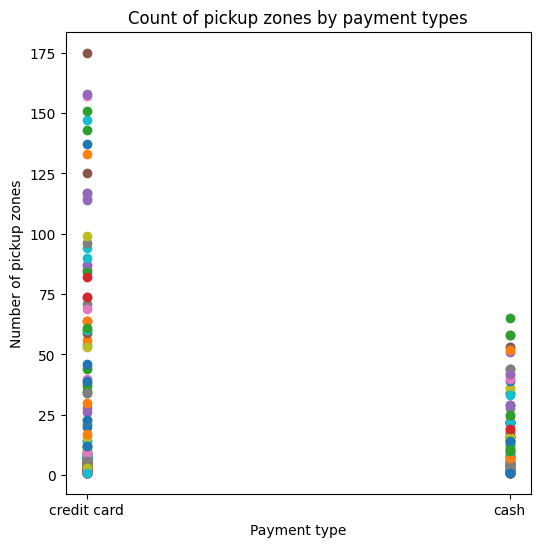

In [6]:
grouped = data.groupby(['pickup_zone', 'payment']).size().reset_index(name='count')

plt.figure(figsize=(6, 6))
for pickup_zone in grouped['pickup_zone'].unique():
    subset = grouped[grouped['pickup_zone'] == pickup_zone]
    plt.scatter(subset['payment'], subset['count'])

plt.title('Count of pickup zones by payment types')
plt.xlabel('Payment type')
plt.ylabel('Number of pickup zones')
plt.show()

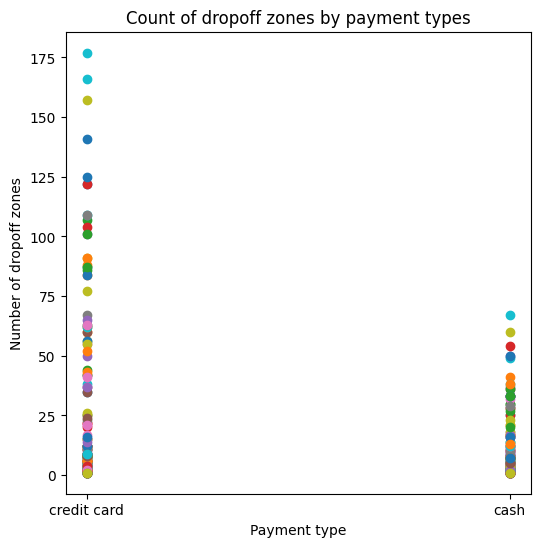

In [7]:
grouped = data.groupby(['dropoff_zone','payment']).size().reset_index(name='count')
plt.figure(figsize=(6, 6))
for dropoff_zone in grouped['dropoff_zone'].unique():
    subset = grouped[grouped['dropoff_zone']==dropoff_zone]
    plt.scatter(subset['payment'], subset['count'])
plt.title('Count of dropoff zones by payment types')
plt.xlabel('Payment type')
plt.ylabel('Number of dropoff zones')
plt.show()

In [8]:
data.nunique()

passengers            7
distance           1079
fare                220
tip                 489
tolls                16
total               898
color                 2
payment               2
pickup_zone         194
dropoff_zone        203
pickup_borough        4
dropoff_borough       5
dtype: int64

We'll consider only numerical columns.

In [9]:
data = data[['passengers','distance','fare','tip','tolls','total']]
data

,passengers,distance,fare,tip,tolls,total
0,1,1.60,7.0,2.15,0.0,12.95
1,1,0.79,5.0,0.00,0.0,9.30
2,1,1.37,7.5,2.36,0.0,14.16
3,1,7.70,27.0,6.15,0.0,36.95
4,3,2.16,9.0,1.10,0.0,13.40
...,...,...,...,...,...,...
6428,1,0.75,4.5,1.06,0.0,6.36
6429,1,18.74,58.0,0.00,0.0,58.80
6430,1,4.14,16.0,0.00,0.0,17.30
6431,1,1.12,6.0,0.00,0.0,6.80


In [10]:
data.isnull().sum()

passengers    0
distance      0
fare          0
tip           0
tolls         0
total         0
dtype: int64

In [11]:
data.isna().sum()

passengers    0
distance      0
fare          0
tip           0
tolls         0
total         0
dtype: int64

In [12]:
data.isin(['',' ','-']).sum()

passengers    0
distance      0
fare          0
tip           0
tolls         0
total         0
dtype: int64

<Axes: >

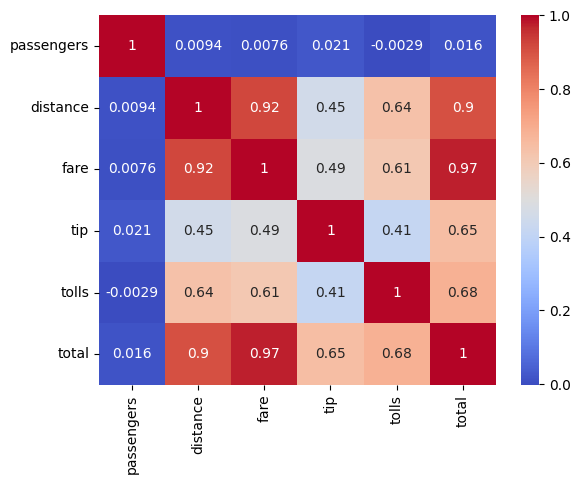

In [15]:
heatmap(data.corr(),annot=True,cmap='coolwarm')

In [16]:
data = data.drop(columns=['passengers'])
data

,distance,fare,tip,tolls,total
0,1.60,7.0,2.15,0.0,12.95
1,0.79,5.0,0.00,0.0,9.30
2,1.37,7.5,2.36,0.0,14.16
3,7.70,27.0,6.15,0.0,36.95
4,2.16,9.0,1.10,0.0,13.40
...,...,...,...,...,...
6428,0.75,4.5,1.06,0.0,6.36
6429,18.74,58.0,0.00,0.0,58.80
6430,4.14,16.0,0.00,0.0,17.30
6431,1.12,6.0,0.00,0.0,6.80


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['total']),data['total'],test_size=0.2,random_state=37)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: 3.216637945461768
Coefficient: [0.01233956 0.96292916 1.17722303 1.02561578]


In [19]:
y_pred = model.predict(X_test)

predictions = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
predictions

,Actual,Predicted
1794,45.06,45.505427
2417,15.80,14.329810
2874,16.00,16.147250
4673,17.16,16.727322
1254,8.84,8.991757
...,...,...
434,26.76,25.833711
6274,14.30,15.772599
3640,67.80,66.311767
5893,55.05,54.044803


In [20]:
mse = mean_squared_error(y_test,y_pred)
print(f"Mean squared error: {mse}")

Mean squared error: 1.2617856498453075


In [21]:
r2 = r2_score(y_test,y_pred)
print(f"R-squared score: {r2}")

R-squared score: 0.9934375316207977


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_with_const = add_constant(data)
vif = pd.DataFrame(
{'Column':df_with_const.columns,
'VIF': np.sqrt([variance_inflation_factor(df_with_const.values,i) for i in range(df_with_const.shape[1])])}
)
vif

,Column,VIF
0,const,3.451775
1,distance,2.631792
2,fare,10.783875
3,tip,2.920189
4,tolls,1.883115
5,total,12.902915


In [23]:
data = data.drop(columns=['fare'])
data

,distance,tip,tolls,total
0,1.60,2.15,0.0,12.95
1,0.79,0.00,0.0,9.30
2,1.37,2.36,0.0,14.16
3,7.70,6.15,0.0,36.95
4,2.16,1.10,0.0,13.40
...,...,...,...,...
6428,0.75,1.06,0.0,6.36
6429,18.74,0.00,0.0,58.80
6430,4.14,0.00,0.0,17.30
6431,1.12,0.00,0.0,6.80


In [24]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data.drop(columns=['total']),data['total'],test_size=0.2,random_state=37)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

print(f"Intercept: {model2.intercept_}")
print(f"Coefficient: {model2.coef_}")

Intercept: 7.316684354505121
Coefficient: [2.51902406 1.62077481 1.29690354]


In [25]:
y_pred2 = model2.predict(X_test2)

predictions = pd.DataFrame({'Actual': y_test2,'Predicted':y_pred2})
predictions

,Actual,Predicted
1794,45.06,49.110072
2417,15.80,15.377561
2874,16.00,15.702324
4673,17.16,18.703085
1254,8.84,11.303201
...,...,...
434,26.76,21.472656
6274,14.30,15.050088
3640,67.80,64.890354
5893,55.05,49.276242


In [26]:
mse = mean_squared_error(y_test2,y_pred2)
print(f"Mean squared error: {mse}")

Mean squared error: 13.625969463013577


In [27]:
r2 = r2_score(y_test2,y_pred2)
print(f"R-squared score: {r2}")

R-squared score: 0.9291321836256701


In [28]:
df_with_const2 = add_constant(data)
vif = pd.DataFrame(
{'Column':df_with_const2.columns,
'VIF': np.sqrt([variance_inflation_factor(df_with_const2.values,i) for i in range(df_with_const2.shape[1])])}
)
vif

,Column,VIF
0,const,2.206072
1,distance,2.569853
2,tip,1.434385
3,tolls,1.372055
4,total,3.125606
